In [15]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from scipy import stats

In [16]:
df = pd.read_csv('../data/data_processed_fee.csv', 
                 index_col='date', 
                 parse_dates=['date'],
                 infer_datetime_format=True)

In [20]:
#df.results.value_counts()
x = 125693/475384
print(x)
# dropping the columns that we do not need
#df.drop('message', axis=1, inplace=True)
#df.drop('status', axis=1, inplace=True)
#df.drop('name', axis=1, inplace=True)
#df.drop('fullname', axis=1, inplace=True)
#df.drop('filenames', axis=1, inplace=True)

0.2644030930784376


In [4]:
seed = 7
array = df.values
X = array[:,0:37]
Y = array[:,37]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
#scoring = 'accuracy'.
scoring = 'roc_auc'

In [6]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/sources/github-data/venv/lib/python3.7/site-package

LR: 0.502060 (0.002563)
KNN: 0.591829 (0.003481)
CART: 0.583106 (0.003066)
NB: 0.547972 (0.003104)
SVM: 0.522340 (0.027377)
RF: 0.614493 (0.002772)


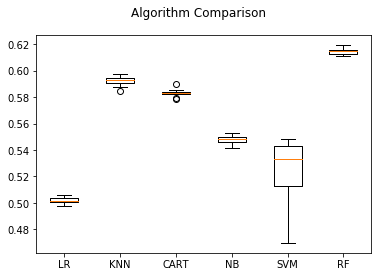

In [7]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig.savefig('baseline-algorithms.png')

In [8]:
dtc = LogisticRegression()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7915868438565005
[[157016      0]
 [ 41340      0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    157016
           1       0.00      0.00      0.00     41340

    accuracy                           0.79    198356
   macro avg       0.40      0.50      0.44    198356
weighted avg       0.63      0.79      0.70    198356



In [9]:
dtc = LinearDiscriminantAnalysis()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7915868438565005
[[157016      0]
 [ 41340      0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    157016
           1       0.00      0.00      0.00     41340

    accuracy                           0.79    198356
   macro avg       0.40      0.50      0.44    198356
weighted avg       0.63      0.79      0.70    198356



In [10]:
dtc = KNeighborsClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7615751477142109
[[144956  12060]
 [ 35233   6107]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86    157016
           1       0.34      0.15      0.21     41340

    accuracy                           0.76    198356
   macro avg       0.57      0.54      0.53    198356
weighted avg       0.71      0.76      0.72    198356



In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.739836455665571
[[139550  17466]
 [ 34139   7201]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84    157016
           1       0.29      0.17      0.22     41340

    accuracy                           0.74    198356
   macro avg       0.55      0.53      0.53    198356
weighted avg       0.70      0.74      0.71    198356



In [12]:
svn = GaussianNB()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.28932827844884956
[[ 20876 136140]
 [  4826  36514]]
              precision    recall  f1-score   support

           0       0.81      0.13      0.23    157016
           1       0.21      0.88      0.34     41340

    accuracy                           0.29    198356
   macro avg       0.51      0.51      0.28    198356
weighted avg       0.69      0.29      0.25    198356



In [13]:
svn = LinearSVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/sources/github-data/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7711337191715905
[[151250   5766]
 [ 39631   1709]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87    157016
           1       0.23      0.04      0.07     41340

    accuracy                           0.77    198356
   macro avg       0.51      0.50      0.47    198356
weighted avg       0.67      0.77      0.70    198356



In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7615751477142109
[[144956  12060]
 [ 35233   6107]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86    157016
           1       0.34      0.15      0.21     41340

    accuracy                           0.76    198356
   macro avg       0.57      0.54      0.53    198356
weighted avg       0.71      0.76      0.72    198356



In [14]:
# Normalize z-value (all columns)
# Logistic Regression on the data
# Run xgboost (expect better results)
# Table with all algorithm
# Compare features (with xgboost x shap value)
# Write the paper